In [9]:
pip install baselines

Processing c:\users\xzsha\appdata\local\pip\cache\wheels\54\26\5f\094dbbc691512c9f5a7e82c92557a04140b773907af0016889\baselines-0.1.5-py3-none-any.whl
  Using cached dill-0.3.3-py2.py3-none-any.whl (81 kB)
Processing c:\users\xzsha\appdata\local\pip\cache\wheels\b3\03\54\9141c232861b89be935b37bdde0ea5ab472f5e18fc20623aed\gym-0.18.3-py3-none-any.whl
  Using cached mpi4py-3.0.3-cp38-cp38-win_amd64.whl (440 kB)
  Using cached progressbar2-3.53.1-py2.py3-none-any.whl (25 kB)
Processing c:\users\xzsha\appdata\local\pip\cache\wheels\ea\fc\e8\09bb6b4ac8aa0df5f0b402df540308fada9be0b6f056a9c19a\zmq-0.0.0-py3-none-any.whl
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  Using cached python_utils-2.5.6-py2.py3-none-any.whl (12 kB)
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py: started
    Running setup.py install for mujoco-py: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\XzSha\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\XzSha\\AppData\\Local\\Temp\\pip-install-3tjwg9k0\\mujoco-py\\setup.py'"'"'; __file__='"'"'C:\\Users\\XzSha\\AppData\\Local\\Temp\\pip-install-3tjwg9k0\\mujoco-py\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\XzSha\AppData\Local\Temp\pip-wheel-khfarvft'
       cwd: C:\Users\XzSha\AppData\Local\Temp\pip-install-3tjwg9k0\mujoco-py\
  Complete output (54 lines):
  running bdist_wheel
  running build
  
  You appear to be missing MuJoCo.  We expected to find the file here: C:\Users\XzSha\.mujoco\mjpro150
  
  This package only provides python bindings, the library must be installed separately.
  
  Please follow the instructions on the README to install MuJoCo
  
      h

In [8]:

from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
import random

import tensorflow as tf
from tensorflow import keras

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [9]:
path = 'D:\Downloads\openstack.csv'

In [10]:
openstack = pd.read_csv(path)

In [11]:
openstack.head() #Check the first 5 rows of the Openstack dataset

,Unnamed: 0,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,6,00057454f6609871c2cabf874876d26a6d0d0641,1358516662,0,0,2,2,2,2,1,...,259.0,259.0,0.003472,0.902778,0.902778,4,False,False,0.0,2
1,9,0007d255d9b20da4e5bbcdbaf5813104fbc092da,1358353428,0,0,9,6,1,1,1,...,276.0,277.0,0.024735,0.978799,0.982332,15,False,False,0.0,2
2,11,0014f2c828dae5f9481a2bac68fe90a7857b2f59,1377995125,0,0,7,8,2,1,1,...,257.0,275.0,0.200000,0.573333,0.613333,15,False,False,0.0,3
3,14,001961ed495a33cc944407888a2797f8a600e091,1367268702,0,0,6,0,1,1,1,...,1922.0,2506.0,0.217116,0.435363,0.567580,6,False,False,0.0,2
4,15,001d36c97eac77410f7dd32290d2142abfb19fa0,1392721937,0,0,12,6,2,2,1,...,1361.0,2241.0,0.147545,0.184703,0.304041,18,False,False,0.0,4


In [12]:

openstack = openstack.drop(['Unnamed: 0'],axis=1) #Drop the Unnamed: 0 Column, as it serves no purpose for this project

In [13]:
openstack.head() #Check the head once more to verify that the column has been dropped

,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,ent,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,00057454f6609871c2cabf874876d26a6d0d0641,1358516662,0,0,2,2,2,2,1,1.000000,...,259.0,259.0,0.003472,0.902778,0.902778,4,False,False,0.0,2
1,0007d255d9b20da4e5bbcdbaf5813104fbc092da,1358353428,0,0,9,6,1,1,1,0.000000,...,276.0,277.0,0.024735,0.978799,0.982332,15,False,False,0.0,2
2,0014f2c828dae5f9481a2bac68fe90a7857b2f59,1377995125,0,0,7,8,2,1,1,0.996792,...,257.0,275.0,0.200000,0.573333,0.613333,15,False,False,0.0,3
3,001961ed495a33cc944407888a2797f8a600e091,1367268702,0,0,6,0,1,1,1,0.000000,...,1922.0,2506.0,0.217116,0.435363,0.567580,6,False,False,0.0,2
4,001d36c97eac77410f7dd32290d2142abfb19fa0,1392721937,0,0,12,6,2,2,1,0.309543,...,1361.0,2241.0,0.147545,0.184703,0.304041,18,False,False,0.0,4


In [14]:
openstack.shape #Dimensions of dataset

(12374, 36)

In [15]:
openstack.keys()

Index(['commit_id', 'author_date', 'bugcount', 'fixcount', 'la', 'ld', 'nf',
       'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'hcmt', 'self', 'ndev',
       'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp', 'rrexp', 'orexp',
       'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr', 'churn', 'buggy',
       'fix', 'bugdens', 'strata'],
      dtype='object')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

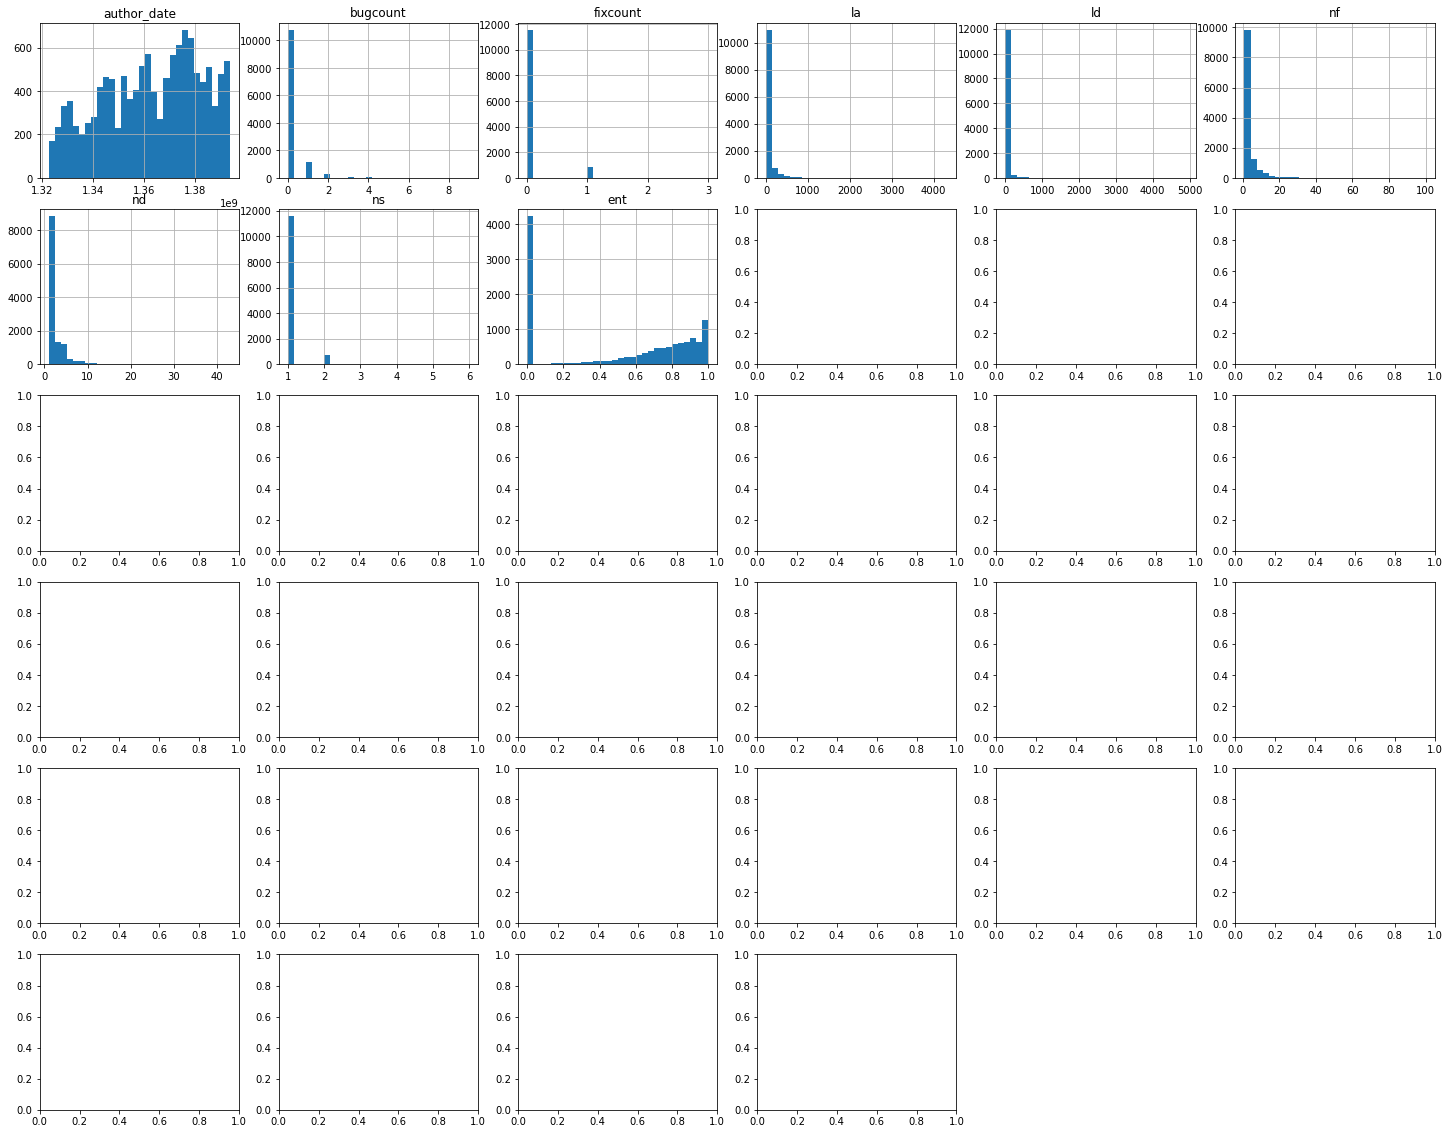

In [16]:
openstack.hist(bins=30, figsize=(25,20))

In [17]:
buggySet = openstack.loc[openstack["buggy"]==1].dropna()

In [40]:
buggySet = openstack.loc[openstack["self"]==1].dropna()
openstack = openstack.loc[openstack["self"]==1].dropna()

In [42]:
buggySet = openstack.loc[openstack["buggy"]==1].dropna()
buggySet = buggySet.sample(frac=1).reset_index(drop=True)   # shuffle

buggySet_test = buggySet.sample(frac=0.2)
buggySet_train = buggySet[~buggySet.isin(buggySet_test)].dropna()

print(len(buggySet_test))
print(len(buggySet_train))

2
10


In [43]:
cleanSet = openstack.loc[openstack["buggy"]==0].dropna()
cleanSet = cleanSet.sample(frac=1).reset_index(drop=True)
cleanSet_train = cleanSet.sample(n=1290).dropna()
print(len(cleanSet_train))
print(len(buggySet_train))

cleanSet_test = cleanSet[~cleanSet.isin(cleanSet_train)].dropna().sample(n=278)
print(len(cleanSet_test))

ValueError: Cannot take a larger sample than population when 'replace=False'

In [44]:
testSet = pd.concat([cleanSet_test, buggySet_test], axis=0)
testSet = testSet.sample(frac=1).reset_index(drop=True)

trainSet = pd.concat([cleanSet_train, buggySet_train], axis=0)
trainSet = trainSet.sample(frac=1).reset_index(drop=True)

In [45]:
testSet.head()

,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,ent,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,a8b619dd611fb68167332fa7373bbd3fe578ecde,1.377675e+09,0.0,0.0,11.0,4.0,2.0,2.0,1.0,0.970951,...,216.0,230.0,0.349398,0.871486,0.927711,15.0,0.0,0.0,0.0,3.0
1,5b4795e4ac92cced08609b57dbd8530218c10f13,1.380818e+09,0.0,0.0,6.0,6.0,1.0,1.0,1.0,0.000000,...,1784.0,2299.0,0.128454,0.288415,0.371627,12.0,0.0,0.0,0.0,3.0
2,d912a5df135eb383d91277682090dfd065c8de91,1.345744e+09,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.000000,...,353.0,354.0,0.025157,0.742138,0.744235,4.0,0.0,0.0,0.0,1.0
3,f35d71cdc3127832d3ecfe3e8803352086cefaff,1.387290e+09,0.0,0.0,3.0,2.0,1.0,1.0,1.0,0.000000,...,1701.0,1962.0,0.052180,0.247384,0.285320,5.0,0.0,0.0,0.0,4.0
4,c07ec51dba9b1b3a3b45d6b73dd0cac736d633b8,1.364222e+09,0.0,0.0,5.0,0.0,1.0,1.0,1.0,0.000000,...,957.0,957.0,0.101795,0.226264,0.226264,5.0,0.0,0.0,0.0,2.0


In [46]:
trainSet.head()

,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,ent,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,d4e02a2e8b50ae9272efc07cd44217333b4aacd6,1.379624e+09,0.0,0.0,28.0,19.0,2.0,2.0,2.0,0.999673,...,355.0,479.0,0.235127,0.504249,0.679887,47.0,0.0,0.0,0.0,3.0
1,3a2529cfa45c79984d342fe5b42c47e515e024bf,1.361888e+09,0.0,0.0,2.0,3.0,1.0,1.0,1.0,0.000000,...,382.0,516.0,0.318123,0.499348,0.674055,5.0,0.0,0.0,0.0,2.0
2,3035a93ed2c467fb248a77389274033ff540590c,1.375210e+09,0.0,0.0,45.0,1.0,2.0,2.0,2.0,0.615254,...,126.0,248.0,0.251701,0.215986,0.423469,46.0,0.0,0.0,0.0,3.0
3,9cd7c6c15514794afba5ac019823578aa7fe92a9,1.379104e+09,0.0,0.0,28.0,0.0,1.0,1.0,1.0,0.000000,...,156.0,378.0,0.478333,0.261667,0.631667,28.0,0.0,0.0,0.0,3.0
4,85f857e62a5edacbf467c19add6e51565ae3669f,1.354957e+09,0.0,0.0,31.0,2.0,4.0,3.0,1.0,0.606991,...,1229.0,1239.0,0.004423,0.388626,0.391785,33.0,0.0,0.0,0.0,2.0


In [47]:
openstack['revd'] = openstack['revd'].astype(int)
openstack['fix'] = openstack['fix'].astype(int)
openstack['buggy'] = openstack['buggy'].astype(int)

array([[<AxesSubplot:xlabel='buggy', ylabel='buggy'>,
        <AxesSubplot:xlabel='nrev', ylabel='buggy'>,
        <AxesSubplot:xlabel='fixcount', ylabel='buggy'>,
        <AxesSubplot:xlabel='bugdens', ylabel='buggy'>,
        <AxesSubplot:xlabel='nf', ylabel='buggy'>,
        <AxesSubplot:xlabel='la', ylabel='buggy'>,
        <AxesSubplot:xlabel='ld', ylabel='buggy'>,
        <AxesSubplot:xlabel='strata', ylabel='buggy'>],
       [<AxesSubplot:xlabel='buggy', ylabel='nrev'>,
        <AxesSubplot:xlabel='nrev', ylabel='nrev'>,
        <AxesSubplot:xlabel='fixcount', ylabel='nrev'>,
        <AxesSubplot:xlabel='bugdens', ylabel='nrev'>,
        <AxesSubplot:xlabel='nf', ylabel='nrev'>,
        <AxesSubplot:xlabel='la', ylabel='nrev'>,
        <AxesSubplot:xlabel='ld', ylabel='nrev'>,
        <AxesSubplot:xlabel='strata', ylabel='nrev'>],
       [<AxesSubplot:xlabel='buggy', ylabel='fixcount'>,
        <AxesSubplot:xlabel='nrev', ylabel='fixcount'>,
        <AxesSubplot:xlabel='fixcount

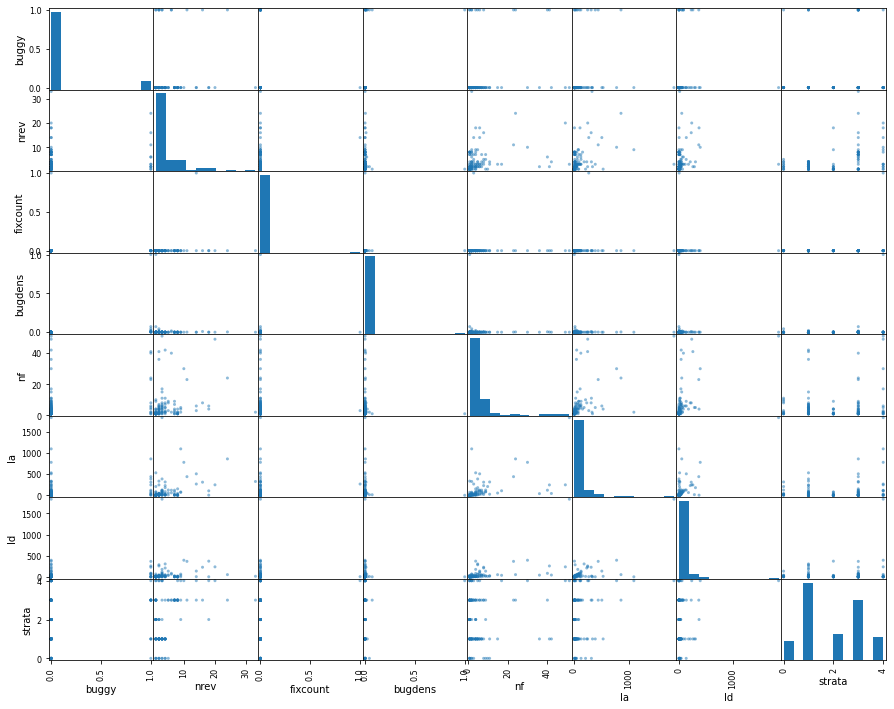

In [48]:
from pandas.plotting import scatter_matrix


attributes = ["buggy", "nrev", "fixcount", "bugdens", "nf", "la","ld", "strata"]

scatter_matrix(openstack[attributes], figsize=(15, 12))

In [49]:
openstack['buggy']

172      0
323      0
357      0
405      0
414      0
        ..
11784    0
11790    0
11883    0
12149    0
12309    0
Name: buggy, Length: 117, dtype: int32

In [50]:
train_y = trainSet['buggy']
trainSet = trainSet.drop(['buggy'],axis=1)
train_x = pd.DataFrame(trainSet).to_numpy()

test_y = testSet['buggy']
testSet = testSet.drop(['buggy'],axis=1)
test_x = pd.DataFrame(testSet).to_numpy()

In [51]:
def preprocess(features):
    pca = PCA(n_components=16, svd_solver='full', whiten=True, random_state=31)
    new_features = pca.fit_transform(features)
    
    scaler = preprocessing.StandardScaler()
    retArray= scaler.fit(new_features)
    retArray= scaler.transform(new_features)
    
    return ret

In [52]:
openstack['revd'] = openstack['revd'].astype(int)
openstack['fix'] = openstack['fix'].astype(int)
openstack['buggy'] = openstack['buggy'].astype(int)
#openstack['self'] = openstack['self'].astype(int)

In [53]:
openstack.keys()

Index(['commit_id', 'author_date', 'bugcount', 'fixcount', 'la', 'ld', 'nf',
       'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'hcmt', 'self', 'ndev',
       'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp', 'rrexp', 'orexp',
       'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr', 'churn', 'buggy',
       'fix', 'bugdens', 'strata'],
      dtype='object')

In [54]:
for col in openstack.columns:
    if openstack[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(openstack[col].value_counts())


Column Name: commit_id
d6ffe3828c5fe0cb86a95c046bb54ceb43da8f6b    1
b4624ec24240c1c15d4daed07afd19eb21474be4    1
279d07eebba14f819d2e950069284d8e18fc04f6    1
30397d8a0a22f3ecad0001ac50a084cc41f4a43d    1
7dc9d462a8dd65605fb987949b503ff0d23fe288    1
                                           ..
8302c4264f3492b693c16aec8e55e2bb8d9c352b    1
a69bc0899092eee29129136864cd78803f4b0112    1
70e0a246f9b3d2920dd80766240e8c23f245fe95    1
f14e955735065a998cd78280661f6d33c850d9e2    1
5247f5cdf15bad4c62bbf854e30716fcf00a1d2a    1
Name: commit_id, Length: 117, dtype: int64

Column Name: self
True    117
Name: self, dtype: int64


In [55]:
#Create training and testing sets
new_train_x = preprocess(train_x)
new_test_x  = preprocess(test_x)

ValueError: could not convert string to float: 'd4e02a2e8b50ae9272efc07cd44217333b4aacd6'

In [134]:
poly = PolynomialFeatures(2)
poly_train = poly.fit_transform(train_x)
poly_test = poly.fit_transform(test_x)

In [135]:
estimt = [50, 100, 150, 200, 250, 300]
criterion = ["gini", "entropy"]

In [136]:

retArray= []
retProbability= []
mods = []
for est in estimt:
    for cri in criterion:
        clf = RandomForestClassifier(n_estimators=est, criterion=cri, random_state=42)
        clf.fit(poly_train, train_y)
        pred = clf.predict(poly_test)
        predictionProbability = clf.predict_proba(poly_test)
        ret.append(pred)
        ret_prob.append(predictionProbability)
        mods.append(clf)

In [139]:
def eva(x, y, prd, prd_prob,model):
    mean_acc = model.score(x, y)
    print("the mean accuracy", mean_acc)
        
    f1 = metrics.f1_score(y, prd, pos_label=1)
    print(f1)
  
    recall = metrics.recall_score(y, prd, pos_label=1)
    precision = metrics.precision_score(y, prd)
    metrics.plot_confusion_matrix(model,x, y)
    plt.show()

    
    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
    ra_score = metrics.roc_auc_score(y, prd_prob[:,1])
    print("Area Under the Receiver Operating Characteristic Curve", ra_score)

    
    return mean_acc,f1,  recall, precision, ra_score

the mean accuracy 1.0
1.0


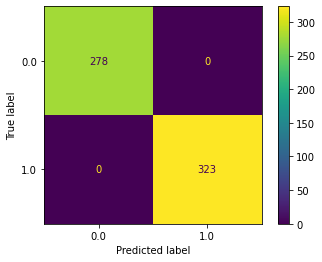

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


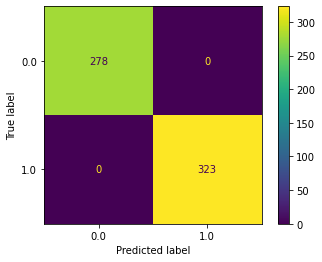

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


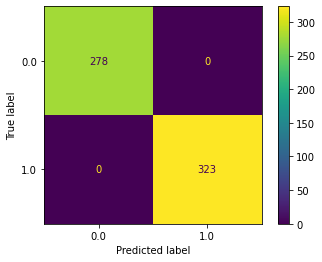

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


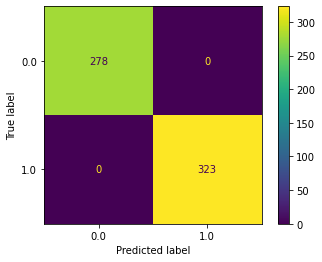

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


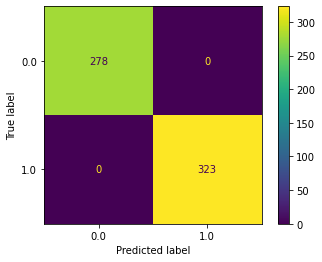

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


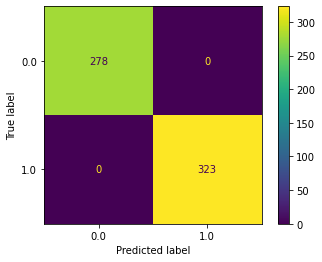

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


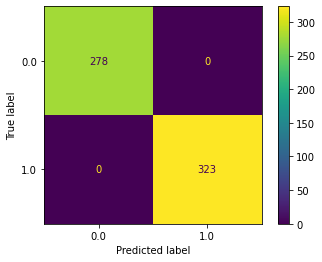

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


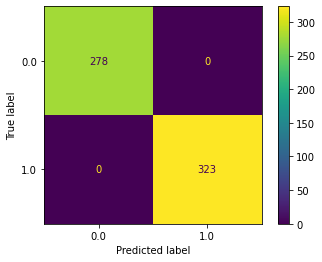

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


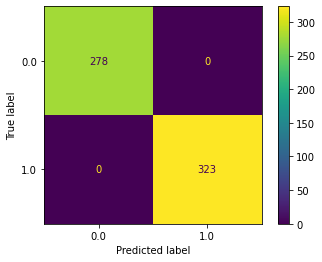

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


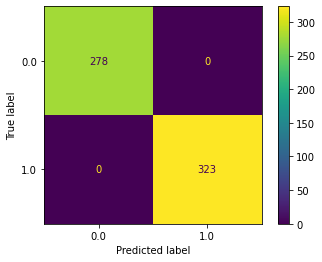

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


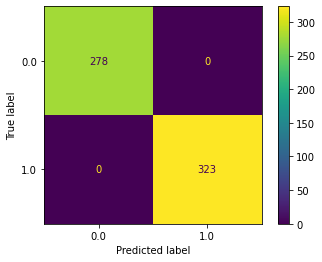

Area Under the Receiver Operating Characteristic Curve 1.0
the mean accuracy 1.0
1.0


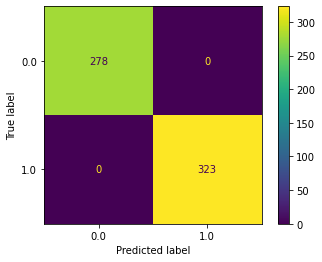

Area Under the Receiver Operating Characteristic Curve 1.0


In [140]:
accs = []
f1s = []
recalls = []
precisions = []
aucs = []
    #Calculate evaluation metrics
for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(poly_test, test_y, ret[i], ret_prob[i], mods[i])
    accs.append(mean_acc)
    f1s.append(f1)
    recalls.append(rec)
    precisions.append(precsson)
    aucs.append(ra_score)

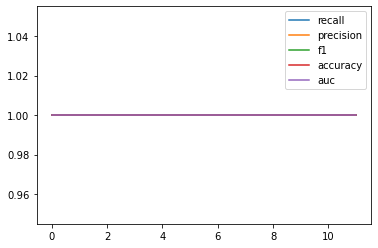

In [141]:
plt.plot(range(12), recalls, label="recall")
plt.plot(range(12), precisions, label="precision")
plt.plot(range(12), f1s, label="f1")
plt.plot(range(12), accs, label="accuracy")
plt.plot(range(12), aucs, label="auc")
plt.legend()
plt.show()

In [142]:
retArray= []
retProbability= []
mods = []
for est in estimt:
    for cri in criterion:
        clf = RandomForestClassifier(n_estimators=est, criterion=cri, random_state=42)
        clf.fit(new_train_x, train_y)
        pred = clf.predict(new_test_x)
        pred_prob = clf.predict_proba(new_test_x)
        ret.append(pred)
        ret_prob.append(pred_prob)
        mods.append(clf)

the mean accuracy 0.6289517470881864
0.6174957118353345


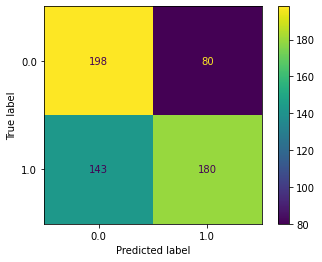

Area Under the Receiver Operating Characteristic Curve 0.7013775976123127
the mean accuracy 0.632279534109817
0.626057529610829


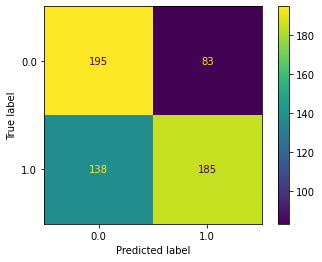

Area Under the Receiver Operating Characteristic Curve 0.6906530503151658
the mean accuracy 0.6439267886855241
0.6372881355932203


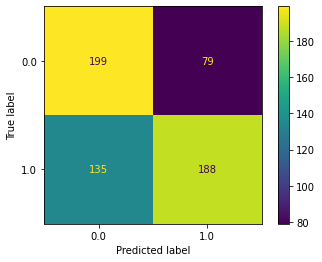

Area Under the Receiver Operating Characteristic Curve 0.7106877965120164
the mean accuracy 0.6455906821963394
0.6408094435075885


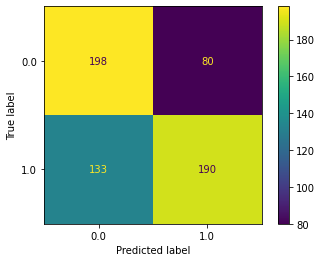

Area Under the Receiver Operating Characteristic Curve 0.7026917165957636
the mean accuracy 0.6522462562396006
0.6499162479061976


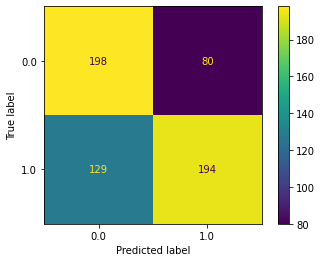

Area Under the Receiver Operating Characteristic Curve 0.7130320511392744
the mean accuracy 0.6372712146422629
0.632996632996633


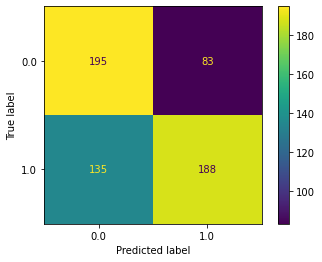

Area Under the Receiver Operating Characteristic Curve 0.7065282758313474
the mean accuracy 0.6622296173044925
0.6599664991624791


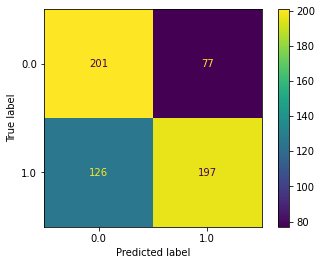

Area Under the Receiver Operating Characteristic Curve 0.713110007350157
the mean accuracy 0.6405990016638935
0.6351351351351351


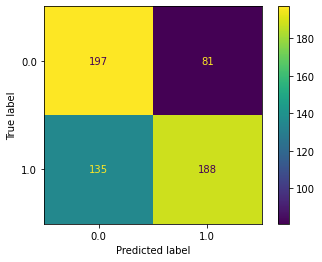

Area Under the Receiver Operating Characteristic Curve 0.7088001425485
the mean accuracy 0.6505823627287853
0.6511627906976745


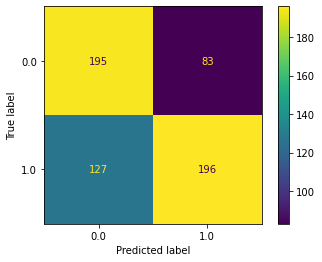

Area Under the Receiver Operating Characteristic Curve 0.7124974942646503
the mean accuracy 0.6439267886855241
0.6409395973154363


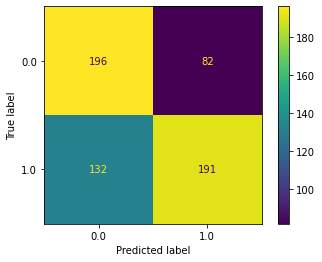

Area Under the Receiver Operating Characteristic Curve 0.7094794752433347
the mean accuracy 0.6605657237936772
0.66


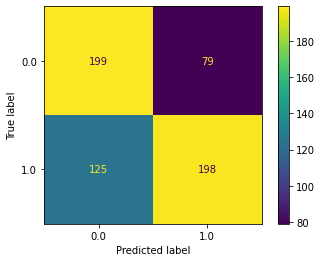

Area Under the Receiver Operating Characteristic Curve 0.7148417488919082
the mean accuracy 0.6422628951747088
0.638655462184874


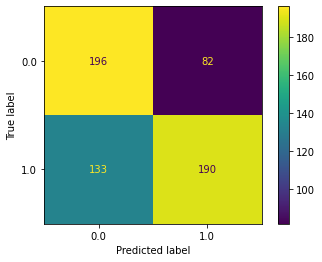

Area Under the Receiver Operating Characteristic Curve 0.7104093814731497


In [143]:
accs = []
f1s = []
recalls = []
precisions = []
aucs = []
    #Calculate evaluation metrics
for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(new_test_x, test_y, ret[i], ret_prob[i], mods[i])
    recalls.append(rec)
    precisions.append(precsson)
    aucs.append(ra_score)
    accs.append(mean_acc)
    f1s.append(f1)  

In [144]:
print(len(recalls))

12


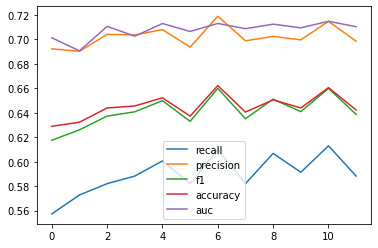

In [145]:
plt.plot(range(12), recalls, label="recall")
plt.plot(range(12), precisions, label="precision")
plt.plot(range(12), f1s, label="f1")
plt.plot(range(12), accs, label="accuracy")
plt.plot(range(12), aucs, label="auc")
plt.legend()
plt.show()

In [146]:
solvers = ['lbfgs', 'liblinear', 'sag']
Cs = [1.0, 0.75, 0.5, 0.25, 0.05]

In [147]:
rets = []
ret_probs = []
ret_log_probas = []
modss = []

for sol in solvers:
    for c in Cs:
        clf = LogisticRegression(solver=sol, C=c, random_state=0)
        clf.fit(poly_train, train_y)
        pred = clf.predict(poly_test)
        pred_prob = clf.predict_proba(poly_test)
        pred_log_proba = clf.predict_log_proba(poly_test)
        rets.append(pred)
        ret_probs.append(pred_prob)
        ret_log_probas.append(pred_log_proba)
        modss.append(clf)

C:\Users\XzSha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\XzSha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\XzSha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\XzSha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\XzSha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

the mean accuracy 0.5707154742096506
0.6183431952662722


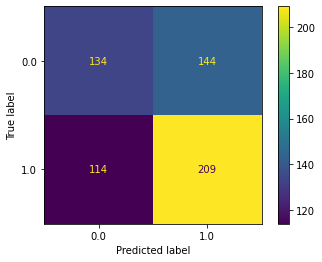

Area Under the Receiver Operating Characteristic Curve 0.5835913312693499
the mean accuracy 0.5707154742096506
0.6183431952662722


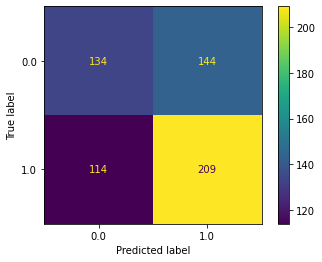

Area Under the Receiver Operating Characteristic Curve 0.5835913312693499
the mean accuracy 0.5707154742096506
0.6183431952662722


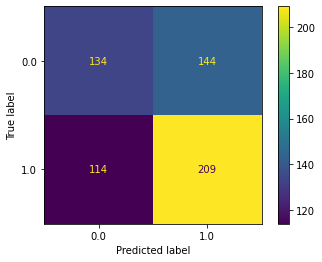

Area Under the Receiver Operating Characteristic Curve 0.5835913312693499
the mean accuracy 0.5707154742096506
0.6183431952662722


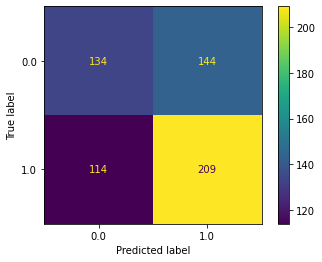

Area Under the Receiver Operating Characteristic Curve 0.5835913312693499
the mean accuracy 0.5707154742096506
0.6183431952662722


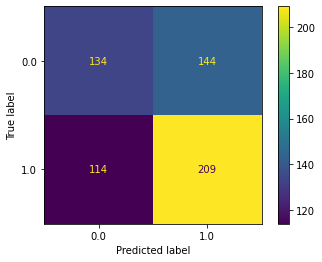

Area Under the Receiver Operating Characteristic Curve 0.5835913312693499
the mean accuracy 0.6023294509151415
0.5799648506151143


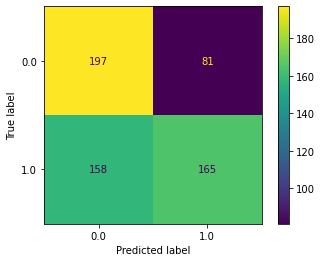

Area Under the Receiver Operating Characteristic Curve 0.6218455576096399
the mean accuracy 0.610648918469218
0.59375


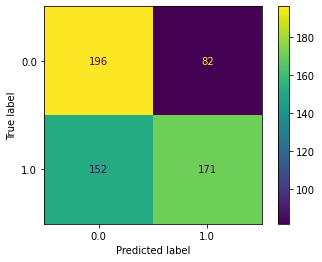

Area Under the Receiver Operating Characteristic Curve 0.6358776755685235
the mean accuracy 0.6023294509151415
0.5799648506151143


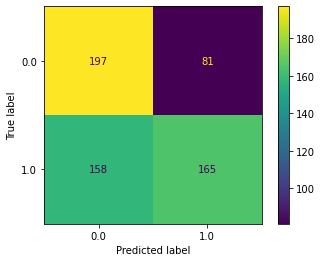

Area Under the Receiver Operating Characteristic Curve 0.6218455576096399
the mean accuracy 0.6023294509151415
0.5799648506151143


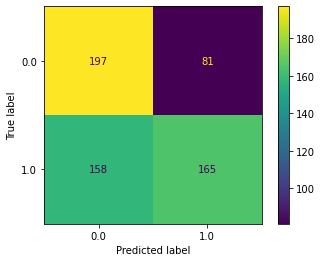

Area Under the Receiver Operating Characteristic Curve 0.6218455576096399
the mean accuracy 0.6073211314475874
0.5902777777777778


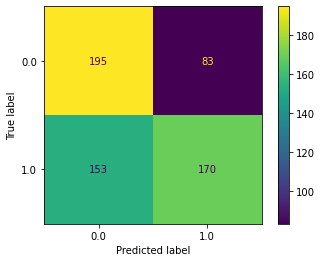

Area Under the Receiver Operating Characteristic Curve 0.6274361315900839
the mean accuracy 0.5690515806988353
0.6162962962962963


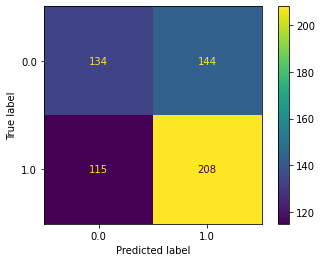

Area Under the Receiver Operating Characteristic Curve 0.5839142927144352
the mean accuracy 0.5690515806988353
0.6162962962962963


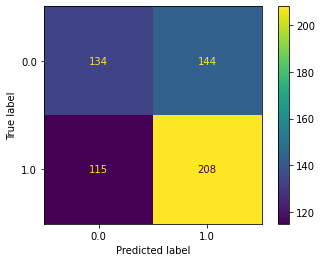

Area Under the Receiver Operating Characteristic Curve 0.5839142927144352


In [148]:
accss = []
f1ss = []
recallss = []
precisionss = []
aucss = []
    #Calculate evaluation metrics
for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(poly_test, test_y, rets[i], ret_probs[i], modss[i])
    accss.append(mean_acc)
    f1ss.append(f1)
    recallss.append(rec)
    precisionss.append(precsson)
    aucss.append(ra_score)

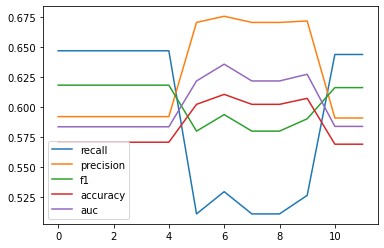

In [149]:

plt.plot(range(12), recallss, label="recall")
plt.plot(range(12), precisionss, label="precision")
plt.plot(range(12), f1ss, label="f1")
plt.plot(range(12), accss, label="accuracy")
plt.plot(range(12), aucss, label="auc")
plt.legend()
plt.show()

In [150]:
rets = []
ret_probs = []
ret_log_probas = []
modss = []

for sol in solvers:
    for c in Cs:
        clf = LogisticRegression(solver=sol, C=c, random_state=0)
        clf.fit(new_train_x, train_y)
        pred = clf.predict(new_test_x)
        pred_prob = clf.predict_proba(new_test_x)
        pred_log_proba = clf.predict_log_proba(new_test_x)
        rets.append(pred)
        ret_probs.append(pred_prob)
        ret_log_probas.append(pred_log_proba)
        modss.append(clf)

the mean accuracy 0.5973377703826955
0.5179282868525896


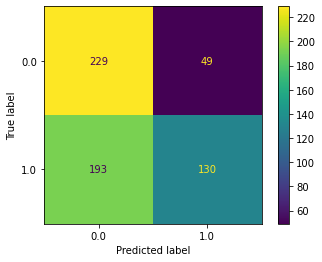

Area Under the Receiver Operating Characteristic Curve 0.6952246252533577
the mean accuracy 0.5973377703826955
0.5179282868525896


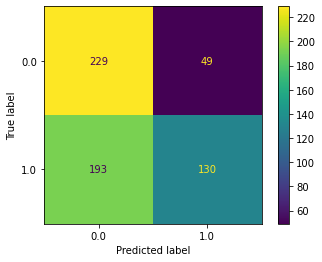

Area Under the Receiver Operating Characteristic Curve 0.6952691716595762
the mean accuracy 0.5973377703826955
0.5179282868525896


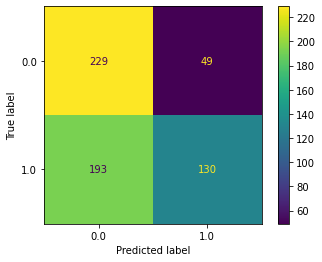

Area Under the Receiver Operating Characteristic Curve 0.6952580350580216
the mean accuracy 0.5973377703826955
0.5179282868525896


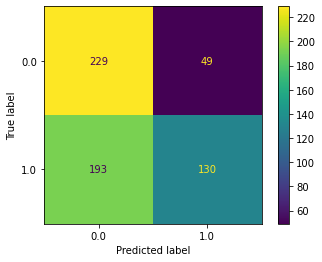

Area Under the Receiver Operating Characteristic Curve 0.695146669042475
the mean accuracy 0.5956738768718802
0.509090909090909


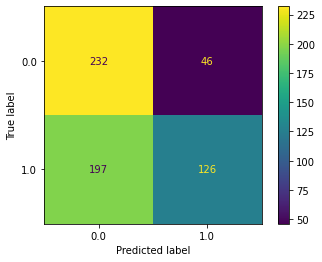

Area Under the Receiver Operating Characteristic Curve 0.6947346147849521
the mean accuracy 0.5973377703826955
0.5179282868525896


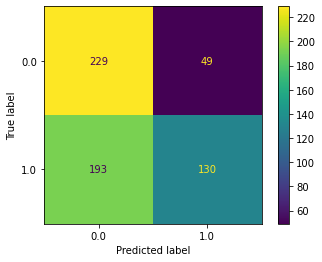

Area Under the Receiver Operating Characteristic Curve 0.6952246252533576
the mean accuracy 0.5973377703826955
0.5179282868525896


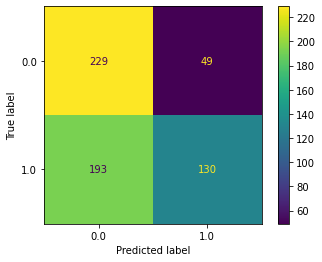

Area Under the Receiver Operating Characteristic Curve 0.6952691716595762
the mean accuracy 0.5973377703826955
0.5179282868525896


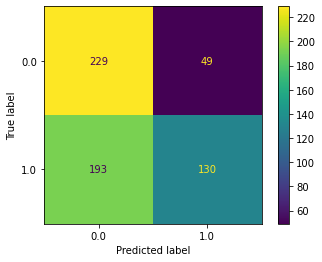

Area Under the Receiver Operating Characteristic Curve 0.695280308261131
the mean accuracy 0.5990016638935108
0.5208747514910538


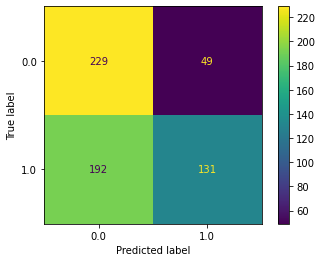

Area Under the Receiver Operating Characteristic Curve 0.695180078847139
the mean accuracy 0.5990016638935108
0.5170340681362725


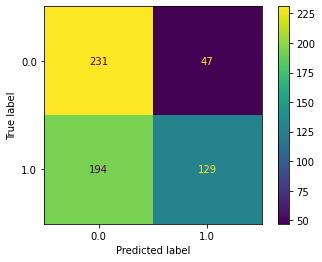

Area Under the Receiver Operating Characteristic Curve 0.6947680245896162
the mean accuracy 0.5973377703826955
0.5179282868525896


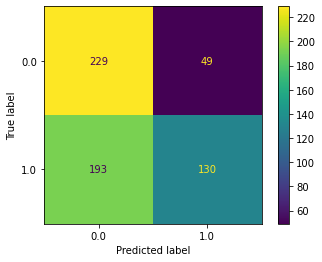

Area Under the Receiver Operating Characteristic Curve 0.6952246252533577
the mean accuracy 0.5973377703826955
0.5179282868525896


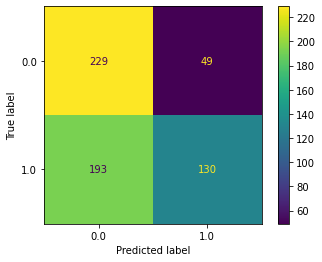

Area Under the Receiver Operating Characteristic Curve 0.6952580350580218


In [151]:
accss = []
f1ss = []
recallss = []
precisionss = []
aucss = []
    #Calculate evaluation metrics
for i in range(len(ret)):
    mean_acc,f1,  rec, precsson, ra_score = eva(new_test_x, test_y, rets[i], ret_probs[i], modss[i])
    accss.append(mean_acc)
    f1ss.append(f1)
    recallss.append(rec)
    precisionss.append(precsson)
    aucss.append(ra_score)

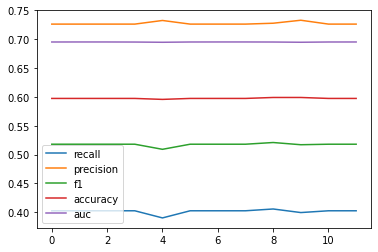

In [152]:
plt.plot(range(12), recallss, label="recall")
plt.plot(range(12), precisionss, label="precision")
plt.plot(range(12), f1ss, label="f1")
plt.plot(range(12), accss, label="accuracy")
plt.plot(range(12), aucss, label="auc")
plt.legend()
plt.show()

In [153]:
np.shape(np.array(new_train_x))

(2876, 16)

In [154]:
#Explore Training sets
x_train = new_train_x.reshape(-1,1,16)     # 1 is the batch
y = to_categorical(train_y, num_classes=2)
print(x_train.shape)

(2876, 1, 16)


In [155]:

np.shape(new_test_x)

(601, 16)

In [156]:
x_test = new_test_x.reshape(-1,1,16)     # 1 is the batch
y_test = to_categorical(test_y, num_classes=2)
print(x_test.shape)

(601, 1, 16)


In [180]:
print(tf.__version__)
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models

2.5.0


In [181]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
from tensorflow.keras.layers import Layer as sfoijso, InputSpec
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models

2.5.0


In [5]:
"""def keras_train(batch_size=32, epochs=2):
    model = keras.Sequential(
        [
            keras.Input(shape=(x_train.shape[-1],)),
            #layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(2, activation="softmax")
        ]
    )

    model.summary()

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    start_time = time.time()
    model.fit(x_train, y, batch_size=batch_size, epochs=10, validation_split=0.1)
    end_time = time.time()

    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("Training Time:", end_time - start_time)

keras_train()"""

'def keras_train(batch_size=32, epochs=2):\n    model = keras.Sequential(\n        [\n            keras.Input(shape=(x_train.shape[-1],)),\n            #layers.Flatten(),\n            layers.Dense(64, activation=\'relu\'),\n            layers.Dense(64, activation=\'relu\'),\n            layers.Dense(2, activation="softmax")\n        ]\n    )\n\n    model.summary()\n\n    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])\n\n    start_time = time.time()\n    model.fit(x_train, y, batch_size=batch_size, epochs=10, validation_split=0.1)\n    end_time = time.time()\n\n    score = model.evaluate(x_test, y_test, verbose=0)\n    print("Test loss:", score[0])\n    print("Test accuracy:", score[1])\n    print("Training Time:", end_time - start_time)\n\nkeras_train()'

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense




# split into input (X) and output (y) variables
X = 
y = 
# fit the keras model on the DeepJIT dataset
model.fit(X, y, epochs=100, batch_size=10)
_, accuracyForDeepJIT = model.evaluate(X, y)
# define the model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracyForDeepJIT'])

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.4f' % (accuracy*100))